# SLA Dip Runbook

This runbook identifies a customer whose SLA is at risk of violation.

In [ ]:
from jupyrest.helpers import Customer, SLADip, save_graph, get_customer, get_past_incident_ids, get_graph
from datetime import datetime

In [ ]:
# Default parameters
customer_id = "xxx"
incident_time = "xxx"
incident_id = "xxx"

Annotate the affected customer with the SLA dip information.

In [ ]:
customer = get_customer(customer_id)
sla_dip = SLADip(incident_id=incident_id, incident_time=datetime.fromisoformat(incident_time), customer=customer)

In [1]:
from jupyrest.graph import visualize, create_graph

In [ ]:
g = create_graph(sla_dip)

In [ ]:
incident_ids = get_past_incident_ids()
print(f"Found previous incidents {incident_ids}")
g = g + get_graph(*incident_ids)

In [ ]:
visualize(g)

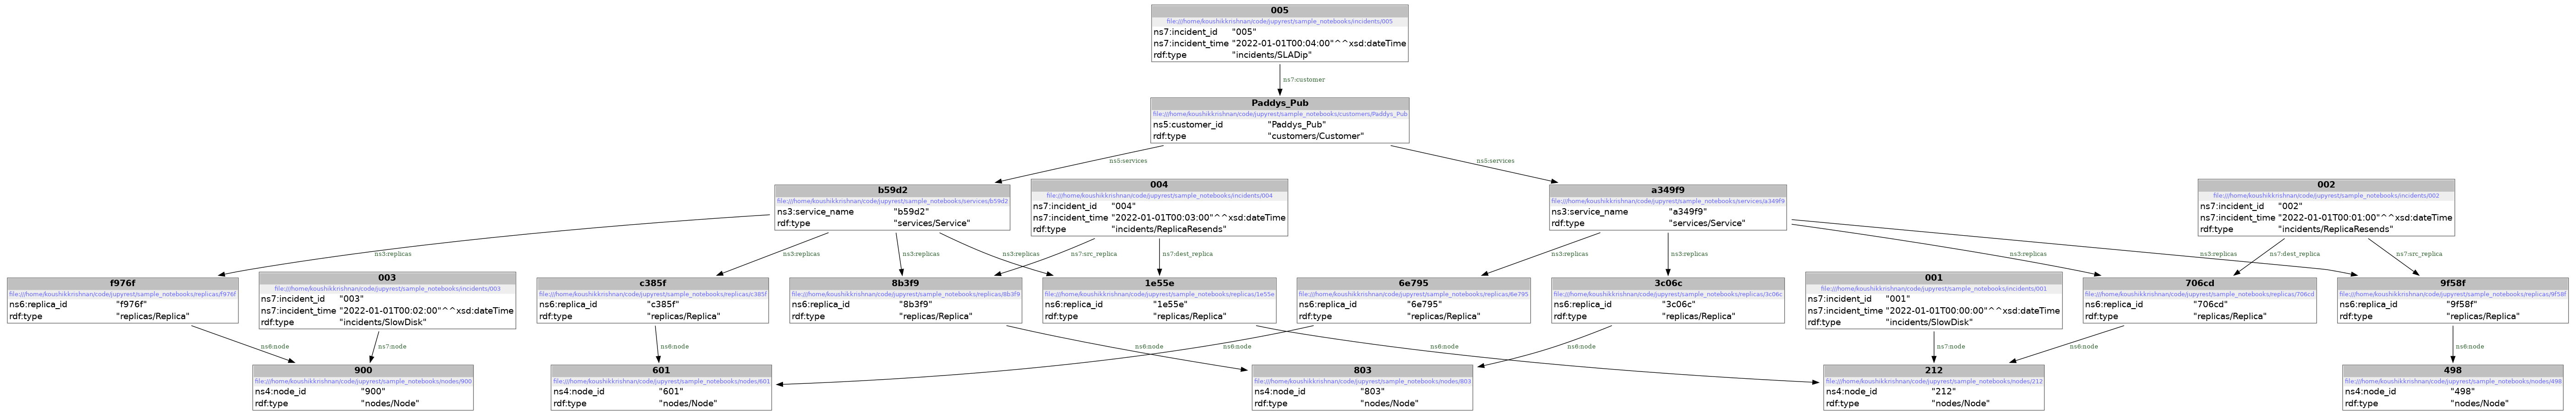

In [3]:
from rdflib import Graph, URIRef
from pathlib import Path
data = Path("yello.ttl").read_text()
g = Graph()
g.parse(data=data)
visualize(g)

In [4]:
res = """
SELECT DISTINCT ?node
WHERE {
    ?sla rdf:type "incidents/SLADip" .
    ?sla ns7:customer ?customer .
    ?customer ns5:services ?service .
    ?service ns3:replicas ?replica .
    ?i rdf:type "incidents/ReplicaResends" .
    { ?i ns7:src_replica ?replica .} UNION
    { ?i ns7:dest_replica ?replica .}
    ?i2 rdf:type "incidents/SlowDisk" .
    ?i2 ns7:node ?node .
    ?replica ns6:node ?node .
}
"""
print(list(g.query(res)))

[(rdflib.term.URIRef('file:///home/koushikkrishnan/code/jupyrest/sample_notebooks/nodes/212'),)]


In [6]:
[URIRef('nodes/212')]

[rdflib.term.URIRef('nodes/212')]